In [ ]:
import plotly.express as px 
import pandas as pd 
import numpy as np 
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import datetime
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from sklearn import svm

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd


mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

print("Import Succesfull")

Import Succesfull


In [ ]:
pip install pmdarima

In [ ]:
# Get some data
df = pd.read_excel("/content/drive/My Drive/Capstone_Commodity_SureshaHP/Onion/Onion_24Aug.xlsx")

In [ ]:
df.head()

,Date,Bengaluru_RetailPrice,Bengaluru_Volume,DieselPrice
0,2015-01-01,2791.0,74978.0,53.74
1,2015-02-01,2750.0,42164.0,51.96
2,2015-03-01,2396.0,41339.0,55.41
3,2015-04-01,2260.0,43534.0,52.56
4,2015-05-01,2458.0,44227.0,58.19


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   67 non-null     datetime64[ns]
 1   Bengaluru_RetailPrice  67 non-null     float64       
 2   Bengaluru_Volume       67 non-null     float64       
 3   DieselPrice            67 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.2 KB


In [ ]:
df.describe()

,Bengaluru_RetailPrice,Bengaluru_Volume,DieselPrice
count,67.000000,67.000000,67.000000
mean,2590.338462,54324.353846,61.314545
std,1597.341544,30058.007039,7.724340
min,1035.000000,14927.000000,47.700000
25%,1549.500000,40406.500000,55.330000
50%,2105.000000,48714.000000,60.710000
75%,3048.000000,56683.000000,68.155000
max,10604.000000,173788.000000,77.170000


In [ ]:
df.shape

(67, 4)

#  Prediction Models

# 1. Auto ARIMA
# ARIMA Autoregressive integrated moving average its a kind of Grid Search start_p = is the Autoregressieve Part, start_d = is the integrated mart \n, start_i = is the movng avaerage part

adf stands for Augmented Dickey-Fuller unit root test. It is used to check whther the data is stationary or not.

In [ ]:
pip install pmdarima

In [ ]:
datetime_series = pd.to_datetime(df['Date'])

# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)

df2=df.set_index(datetime_index)

# we don't need the column anymore
df2.drop('Date',axis=1,inplace=True)

print(df2.index)

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [ ]:
pip install pyramid-arima

     |████████████████████████████████| 604kB 4.6MB/s 


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
import statsmodels.api as sm
import pyramid as pm

In [ ]:
columns = ['Bengaluru_RetailPrice']
df2 = df2[columns]
df2.head()

,Bengaluru_RetailPrice
2015-01-01,2791.0
2015-02-01,2750.0
2015-03-01,2396.0
2015-04-01,2260.0
2015-05-01,2458.0


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
ss_decomposition = seasonal_decompose(df2, 
                                      model='additive', 
                                      freq=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

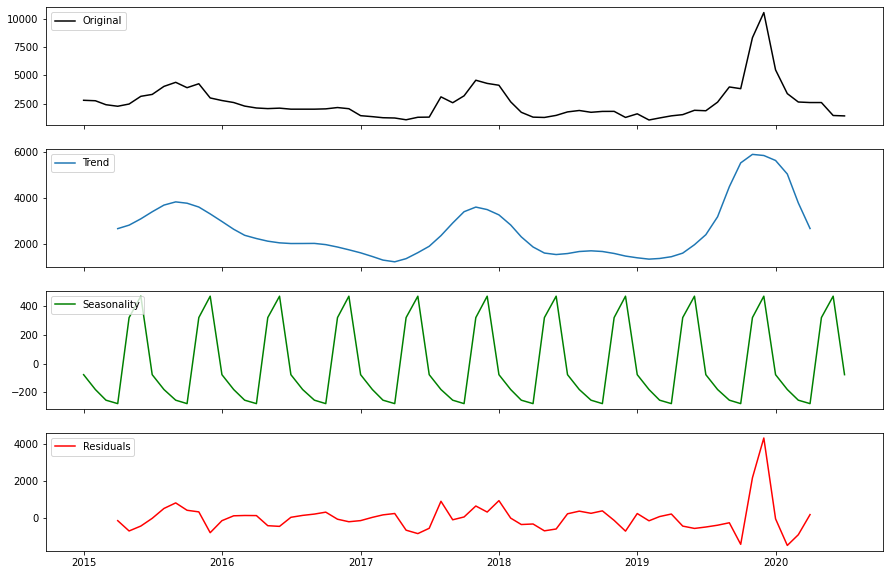

In [ ]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df2, 'k', label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, 'g', label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, 'r', label='Residuals')
axes[3].legend(loc='upper left')

In [ ]:
#divide into train and validation set
train = df2[:int(0.75*(len(df2)))]
test = df2[int(0.75*(len(df2))):]

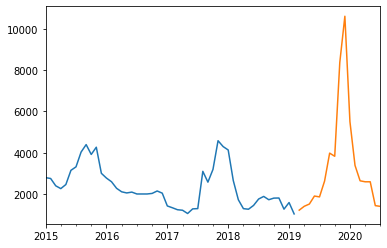

In [ ]:
#plotting the data
train['Bengaluru_RetailPrice'].plot()
test['Bengaluru_RetailPrice'].plot()

In [ ]:
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df2['Bengaluru_RetailPrice'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=931.775, Time=0.73 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1002.636, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=929.233, Time=0.56 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1001.059, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=945.167, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=929.355, Time=0.96 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=929.700, Time=0.49 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=934.674, Time=0.59 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=931.334, Time=1.39 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=964.693, Time=0.34 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=930.512, Time=0.50 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=930.152, Time=0.50 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=934.947, Time=0.55 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   67
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -460.742
Date:                            Sun, 13 Sep 2020   AIC                            927.484
Time:                                    04:43:55   BIC                            933.506
Sample:                                         0   HQIC                           929.813
                                             - 67                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7206      0.042     17.304      0.000       0.639       0.802
ar.S.L12      -0.7017      0.181     -3.875      0.000      -1.057      -0.347
sigma2      1.046e+06   1.41e+05      7.430      0.000     7.7e+05    1.32e+06
===================================================================================
Ljung-Box (Q):                       25.81   Jarque-Bera (JB):               107.76
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               9.01   Skew:                             1.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['Bengaluru_RetailPrice'],  
                order = (0, 1, 0),  
                seasonal_order =(1, 1, 0, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:              Bengaluru_RetailPrice   No. Observations:                   50
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -287.615
Date:                            Sun, 13 Sep 2020   AIC                            579.230
Time:                                    04:43:55   BIC                            582.452
Sample:                                01-01-2015   HQIC                           580.366
                                     - 02-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6304      0.139     -4.525      0.000      -0.903      -0.357
sigma2      2.945e+05   6.78e+04      4.344      0.000    1.62e+05    4.27e+05
===================================================================================
Ljung-Box (Q):                       15.02   Jarque-Bera (JB):                 1.35
Prob(Q):                              1.00   Prob(JB):                         0.51
Heteroskedasticity (H):               1.09   Skew:                             0.39
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

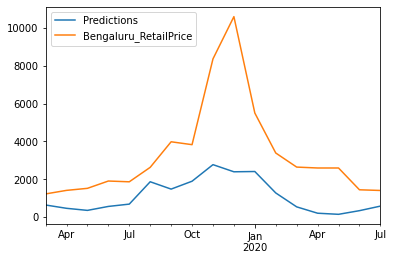

In [ ]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['Bengaluru_RetailPrice'].plot(legend = True) 

In [ ]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(test["Bengaluru_RetailPrice"], predictions) 

2944.7545893911515

In [ ]:
# Calculate mean squared error 
mean_squared_error(test["Bengaluru_RetailPrice"], predictions) 

8671579.591740249

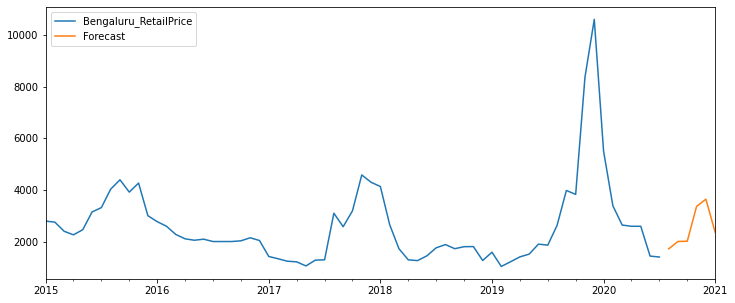

In [ ]:
# Train the model on the full dataset 
model = model = SARIMAX(df2['Bengaluru_RetailPrice'],  
                        order = (0, 1, 0),  
                        seasonal_order =(1, 1, 0, 12)) 
result = model.fit() 
  
# Forecast for the next 6 months
forecast = result.predict(start = len(df2),  
                          end = (len(df2)-1) + 1 * 6,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
df2['Bengaluru_RetailPrice'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

In [ ]:
# forecast for 6 months
forecast.round(1)

2020-08-01    1715.3
2020-09-01    2002.7
2020-10-01    2012.4
2020-11-01    3359.2
2020-12-01    3640.5
2021-01-01    2357.1
Freq: MS, Name: Forecast, dtype: float64

# 2. VAR - Vector auto regression model

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [ ]:
datetime_series = pd.to_datetime(df['Date'])

# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)

df3=df.set_index(datetime_index)

# we don't need the column anymore
df3.drop('Date',axis=1,inplace=True)

print(df3.index)

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [ ]:
col = ['Bengaluru_RetailPrice','Bengaluru_Volume','DieselPrice']
df3 = df3[col]
df3.head()

,Bengaluru_RetailPrice,Bengaluru_Volume,DieselPrice
2015-01-01,2791.0,74978.0,53.74
2015-02-01,2750.0,42164.0,51.96
2015-03-01,2396.0,41339.0,55.41
2015-04-01,2260.0,43534.0,52.56
2015-05-01,2458.0,44227.0,58.19


In [ ]:
#divide into train and validation set
train1 = df3[:int(0.75*(len(df)))]
test1 = df3[int(0.75*(len(df))):]
print(train1.shape)
print(test1.shape)

(50, 3)
(17, 3)


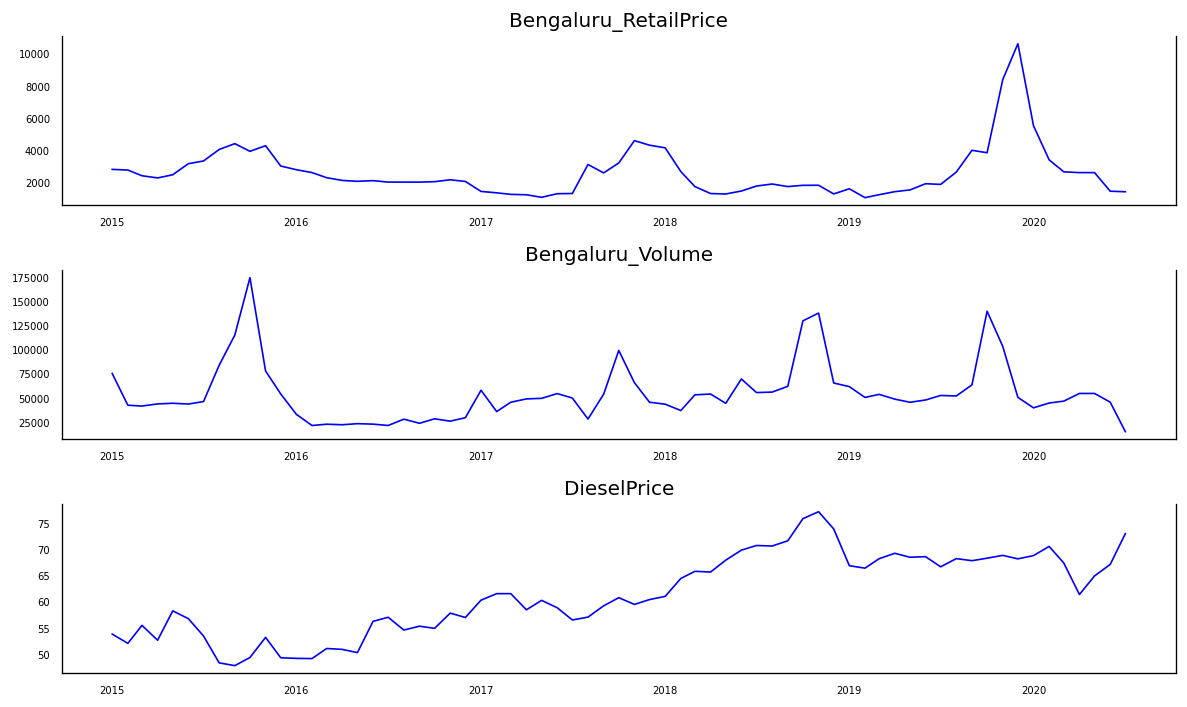

In [ ]:
# Plot
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df3[df3.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # Decorations
    ax.set_title(df3.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Testing Causation using Granger’s Causality Test

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(df3, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(df3[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df3, variables = df3.columns)   


,Bengaluru_RetailPrice_x,Bengaluru_Volume_x,DieselPrice_x
Bengaluru_RetailPrice_y,1.0000,0.0001,0.0004
Bengaluru_Volume_y,0.0236,1.0000,0.0026
DieselPrice_y,0.0015,0.0351,1.0000


# Cointegration Test
Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df3, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df3,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df3.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df3)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Bengaluru_RetailPrice ::  26.34     > 24.2761   =>   True
Bengaluru_Volume ::  11.11     > 12.3212   =>   False
DieselPrice ::  1.21      > 4.1296    =>   False


# Check for Stationarity and Make the Time Series Stationary in VAR

# There is a suite of tests called unit-root tests. The popular ones are:

1.Augmented Dickey-Fuller Test (ADF Test)
2.KPSS test
3.Philip-Perron test

In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [ ]:
# ADF Test on each column
for name, column in train1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Bengaluru_RetailPrice" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7355
 No. Lags Chosen       = 2
 Critical value 1%     = -3.578
 Critical value 5%     = -2.925
 Critical value 10%    = -2.601
 => P-Value = 0.0681. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Bengaluru_Volume" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.2886
 No. Lags Chosen       = 0
 Critical value 1%     = -3.571
 Critical value 5%     = -2.923
 Critical value 10%    = -2.599
 => P-Value = 0.0154. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DieselPrice" 
    -----------------------------------------------
 Null Hypothesis: Da

In [ ]:
# 1st difference
df_differenced = train1.diff().dropna()

# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [ ]:
# ADF Test on each column
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Bengaluru_RetailPrice" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.3321
 No. Lags Chosen       = 1
 Critical value 1%     = -3.581
 Critical value 5%     = -2.927
 Critical value 10%    = -2.602
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Bengaluru_Volume" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.8933
 No. Lags Chosen       = 3
 Critical value 1%     = -3.589
 Critical value 5%     = -2.93
 Critical value 10%    = -2.603
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DieselPrice" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Station

# All Data is stationary after 1 differencing 

In [ ]:
# How to Select the Order (P) of VAR model

modelVAR = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9,10,11]:
    result = modelVAR.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  36.222333554525406
BIC :  36.694711665600316
FPE :  5391347818944351.0
HQIC:  36.40009261103842 

Lag Order = 2
AIC :  36.16113640038688
BIC :  36.99595095095799
FPE :  5101360809254526.0
HQIC:  36.47386293444925 

Lag Order = 3
AIC :  35.915172244500916
BIC :  37.119613904347794
FPE :  4051219259282053.0
HQIC:  36.36417600223547 

Lag Order = 4
AIC :  36.156357222345584
BIC :  37.73779803422768
FPE :  5323046260079659.0
HQIC:  36.74283171414674 

Lag Order = 5
AIC :  36.37908920854075
BIC :  38.34508003536147
FPE :  7048793079695760.0
HQIC:  37.104085866060075 

Lag Order = 6
AIC :  36.29387656301692
BIC :  38.65214247354435
FPE :  7148863539533919.0
HQIC:  37.15827429010281 

Lag Order = 7
AIC :  36.103257005158646
BIC :  38.86169008814607
FPE :  6966100902247965.0
HQIC:  37.10772624832033 

Lag Order = 8
AIC :  35.333311357065426
BIC :  38.49996033352906
FPE :  4235689685378110.5
HQIC:  36.478271635677565 

Lag Order = 9
AIC :  34.5125192071572
BIC :  38.0955750

# alternate method to choose the order(p) of the VAR models is to use the model.select_order(maxlags) method

In [ ]:
x = modelVAR.select_order(maxlags=11)
x.summary()

,AIC,BIC,FPE,HQIC
0,36.12,36.25,4.876e+15,36.17
1,35.76,36.29,3.411e+15,35.95
2,35.50,36.42,2.664e+15,35.83
3,35.40,36.70,2.458e+15,35.86
4,35.63,37.33,3.264e+15,36.23
5,35.73,37.82,3.950e+15,36.47
6,35.72,38.20,4.501e+15,36.59
7,35.34,38.21,3.824e+15,36.35
8,34.39,37.66,2.063e+15,35.54
9,33.85,37.51,2.016e+15,35.14


# The selected order(p) 11 is the order that gives the lowest ‘AIC’, ‘BIC’, ‘FPE’ and ‘HQIC’ scores.

# Train the VAR Model of Selected Order(p)

In [ ]:
model_fitted = modelVAR.fit(11)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 13, Sep, 2020
Time:                     04:44:14
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    33.5358
Nobs:                     37.0000    HQIC:                   30.6605
Log likelihood:          -593.758    FPE:                2.31035e+14
AIC:                      29.0949    Det(Omega_mle):     3.26970e+13
--------------------------------------------------------------------
Results for equation Bengaluru_RetailPrice
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                             9.148282        45.000119            0.203           0.839
L1.Bengaluru_RetailPrice          0.107311         0.361707            0.297           0.

# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [ ]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df3.columns, out):
    print((col), ':', round(val, 2))

Bengaluru_RetailPrice : 1.61
Bengaluru_Volume : 1.6
DieselPrice : 0.82


# forecast

In [ ]:
n_obs =12
X_train,X_test = df3[0:-n_obs],df3[-n_obs:]


In [ ]:
print(X_train.shape)
print(X_test.shape)

(55, 3)
(12, 3)


In [ ]:
X_train_log = np.log(X_train)
X_train_log_diff =(X_train_log).diff().dropna()
X_train_log_diff.describe()

,Bengaluru_RetailPrice,Bengaluru_Volume,DieselPrice
count,54.000000,54.000000,54.000000
mean,-0.007525,-0.006689,0.003979
std,0.217295,0.342029,0.043454
min,-0.442586,-0.807352,-0.101268
25%,-0.079130,-0.165380,-0.019815
50%,-0.017600,0.009999,0.005652
75%,0.085232,0.100206,0.027644
max,0.873920,0.739612,0.112745


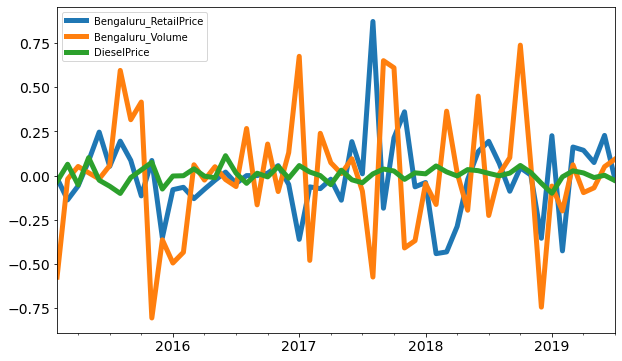

In [ ]:
X_train_log_diff.plot(figsize=(10,6),linewidth=5,fontsize=14)
plt.show()

# auto correleation function analysis of transformed series

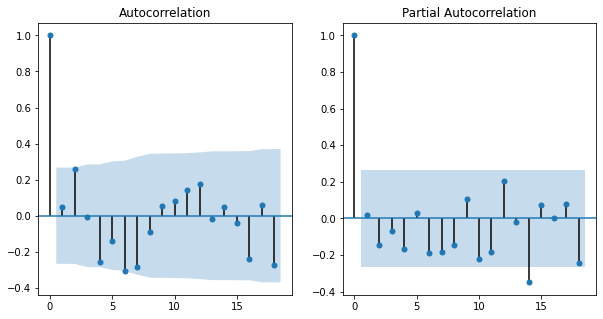

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5)) 
ax[0] = plot_acf(X_train_log_diff['Bengaluru_RetailPrice'], ax=ax[0])
ax[1] = plot_pacf(X_train_log_diff['Bengaluru_Volume'], ax=ax[1])

In [ ]:
mod = VAR(X_train)
res = mod.fit(maxlags=6, ic='aic')
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 13, Sep, 2020
Time:                     04:44:19
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    35.6846
Nobs:                     52.0000    HQIC:                   34.9904
Log likelihood:          -1089.88    FPE:                1.03525e+15
AIC:                      34.5589    Det(Omega_mle):     6.10771e+14
--------------------------------------------------------------------
Results for equation Bengaluru_RetailPrice
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                         1987.061629       855.074559            2.324           0.020
L1.Bengaluru_RetailPrice         0.858816         0.149278            5.753           0.000


In [ ]:
# Get the lag order
lag_order = res.k_ar
print(lag_order)
# Input data for forecasting
input_data = X_train.values[-lag_order:]
print(input_data)
# forecasting
pred = res.forecast(y=input_data, steps=n_obs)
pred = (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred'))
print(pred.round())

3
[[ 1513.   45229.      68.45]
 [ 1900.   47577.      68.56]
 [ 1859.   52246.      66.62]]
            Bengaluru_RetailPrice_pred  Bengaluru_Volume_pred  DieselPrice_pred
2019-08-01                      2011.0                68229.0              67.0
2019-09-01                      2079.0                76279.0              68.0
2019-10-01                      2141.0                74653.0              68.0
2019-11-01                      2108.0                69754.0              67.0
2019-12-01                      2046.0                67598.0              67.0
2020-01-01                      1980.0                66543.0              67.0
2020-02-01                      1933.0                65535.0              67.0
2020-03-01                      1905.0                64126.0              66.0
2020-04-01                      1894.0                63149.0              66.0
2020-05-01                      1899.0                62862.0              66.0
2020-06-01                 

In [ ]:
# Calculate root mean squared error 
rmse(X_test, pred) 

array([3.36344695e+03, 2.93201397e+04, 2.96455545e+00])

# RMSE for Bengaluru Retail price is 3360, Bengaluru Volume is 29320 and for Diesel Price is 2.96